In [1]:
#For importing modules
import os, sys

#For file handling
from glob import glob
from os import listdir
from os.path import isfile, join
import json 

#For image processing
import PIL
import cv2
import nibabel as nib
import nibabel.processing 
from nibabel.processing import resample_to_output
import nilearn


#Image visualisation
import matplotlib.pyplot as plt

#Other
import numpy as np
import math
from random import sample

#Modeling
import tensorflow as tf
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from nilearn.image import concat_imgs, mean_img, resample_img

import tensorflow as tflow
from tensorflow.keras.layers import Flatten
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import precision_score, recall_score, confusion_matrix,classification_report

In [2]:
import tensorflow as tf
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from nilearn.image import concat_imgs, mean_img, resample_img

import tensorflow as tflow
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, BatchNormalization
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import os

import nibabel as nib
import nilearn

import json 

import numpy as np
import math
from random import sample

from sklearn.utils.class_weight import compute_class_weight

In [3]:
sys.path.append('/path/to/2014_07_13_test')
import generate_input

In [4]:
!ls './preprocessed-data/images/'

case_00000.npy case_00060.npy case_00120.npy case_00180.npy case_00240.npy
case_00001.npy case_00061.npy case_00121.npy case_00181.npy case_00241.npy
case_00002.npy case_00062.npy case_00122.npy case_00182.npy case_00242.npy
case_00003.npy case_00063.npy case_00123.npy case_00183.npy case_00243.npy
case_00004.npy case_00064.npy case_00124.npy case_00184.npy case_00244.npy
case_00005.npy case_00065.npy case_00125.npy case_00185.npy case_00245.npy
case_00006.npy case_00066.npy case_00126.npy case_00186.npy case_00246.npy
case_00007.npy case_00067.npy case_00127.npy case_00187.npy case_00247.npy
case_00008.npy case_00068.npy case_00128.npy case_00188.npy case_00248.npy
case_00009.npy case_00069.npy case_00129.npy case_00189.npy case_00249.npy
case_00010.npy case_00070.npy case_00130.npy case_00190.npy case_00250.npy
case_00011.npy case_00071.npy case_00131.npy case_00191.npy case_00251.npy
case_00012.npy case_00072.npy case_00132.npy case_00192.npy case_00252.npy
case_00013.npy case_00073

In [5]:
# load validation set
val_case = ['case_00233', 'case_00089', 'case_00050', 'case_00112', 'case_00258', 'case_00246', 'case_00157', 'case_00149','case_00184']
test_case = ['case_00221', 'case_00259', 'case_00087', 'case_00254', 'case_00098', 'case_00023', 'case_00041',
             'case_00080', 'case_00101', 'case_00164', 'case_00002', 'case_00110', 'case_00030', 'case_00068',
             'case_00026', 'case_00063', 'case_00006', 'case_00048', 'case_00250', 'case_00238', 'case_00015',
             'case_00111', 'case_00278', 'case_00133', 'case_00284', 'case_00282', 'case_00269', 'case_00039',
             'case_00033', 'case_00108', 'case_00175', 'case_00161', 'case_00256', 'case_00119', 'case_00286',
             'case_00077', 'case_00162', 'case_00270', 'case_00271', 'case_00285', 'case_00174', 'case_00147',
             'case_00215', 'case_00150', 'case_00052', 'case_00231', 'case_00198', 'case_00117', 'case_00138',
             'case_00211', 'case_00190', 'case_00248', 'case_00235', 'case_00049', 'case_00074', 'case_00107',
             'case_00218', 'case_00001', 'case_00193', 'case_00067', 'case_00289', 'case_00072', 'case_00044',
             'case_00294', 'case_00298', 'case_00263', 'case_00038', 'case_00299', 'case_00249', 'case_00225',
             'case_00217', 'case_00178', 'case_00082', 'case_00035', 'case_00034', 'case_00047', 'case_00276',
             'case_00151', 'case_00226', 'case_00086', 'case_00176']

In [6]:
def generate_part_label_dict(labels_dict, list_of_cases):
    return {k: labels_dict[k] for k in list_of_cases}

def load_data(rootdir, img_dir, json_path, list_cases):
    val_path = generate_input.processed_image_paths(rootdir, img_dir)
    labels_dict = generate_input.malignant_labels_to_dict(json_path)
    labels_dict_short = generate_part_label_dict(labels_dict, list_cases)
    image_dict_short = generate_input.load_nifti_img_and_mask_as_numpy(val_path, list_cases)
    x_set, y_set = generate_input.fill_set(list_cases, labels_dict_short, image_dict_short, labels_dict)
    x_set = generate_input.adding_channel(x_set)
    return x_set, y_set

In [7]:
def adding_channel_dict(image_dict):
    for key in image_dict:
        image_dict[key] = generate_input.adding_channel(image_dict[key])
    return image_dict

def load_data_to_evaluate_by_majority_voting(rootdir, img_dir, json_path, list_cases):
    val_path = generate_input.processed_image_paths(rootdir, img_dir)
    labels_dict = generate_input.malignant_labels_to_dict(json_path)
    labels_dict_short = generate_part_label_dict(labels_dict, list_cases)
    labels_dict_short = {key: float(value) for key, value in labels_dict_short.items()}
    
    image_dict_short = generate_input.load_nifti_img_and_mask_as_numpy(val_path, list_cases)
    image_dict_short = adding_channel_dict(image_dict_short)
    return image_dict_short, labels_dict_short
    
def create_prediction_dict(image_dict, model):
    pred_dict = {}
    for key in image_dict:
        y_pred = model.predict(image_dict[key])
        pred_dict[key] = np.round(np.sum(y_pred)/len(y_pred))
    return pred_dict

def create_true_and_prediction_lists(true_dict, pred_dict):
    common_keys = true_dict.keys() & pred_dict.keys()
    true_lst = []
    pred_lst = [] 
    for key in common_keys:
        true_lst.append(true_dict[key])
        pred_lst.append(pred_dict[key])   
    return true_lst, pred_lst

In [8]:
x_val, y_val = load_data('./preprocessed-data/', 'images', '../kits21/kits21/data/kits.json', val_case)

In [10]:
# load json and create model
json_file = open('baseline_model/model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("baseline_model/model1.h5")

Metal device set to: Apple M2 Pro


2023-04-06 17:51:16.835804: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-06 17:51:16.835950: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
# evaluate loaded model on test data
optimizer_fn = tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001, jit_compile = False)
metrics_list = [tf.keras.metrics.AUC(name = 'auc'),
                tf.keras.metrics.BinaryAccuracy(name = 'accuracy')]
loaded_model.compile(optimizer = optimizer_fn, loss='binary_crossentropy', metrics= metrics_list)

In [12]:
def get_saliency_map(image, model):
    
    image =tf.Variable(image, dtype = float)
    with tf.GradientTape() as tape:
        tape.watch(image)
        predictions = model(image) 
        loss = predictions[:, 0]
    
    gradient = tape.gradient(loss, image)
    gradient = tf.math.abs(gradient)
    gradient = np.max(gradient, axis=3)[0]
    
    # normaliz between 0 and 1
    min_val, max_val = np.min(gradient), np.max(gradient)
    smap = (gradient - min_val) / (max_val - min_val + tf.keras.backend.epsilon())
    
    return smap

In [48]:
%%capture
%matplotlib inline

from ipywidgets import interact, widgets
from IPython.display import display
import matplotlib.pyplot as plt
import warnings


def f(x):
    
    fig, axes = plt.subplots(1,2, figsize = (14,5))
    

    axes[0].imshow(x_val[x])
    smap = get_saliency_map(x_val[x:x+1], loaded_model)
    ax2 = axes[1].imshow(smap)
    fig.colorbar(ax2)
    
    axes[0].title.set_text('Raw image')
    axes[1].title.set_text('Silency map')
    


In [49]:
interact(f, x=(0,len(x_val)))

interactive(children=(IntSlider(value=928, description='x', max=1856), Output()), _dom_classes=('widget-intera…

<function __main__.f(x)>

(96, 512, 512)


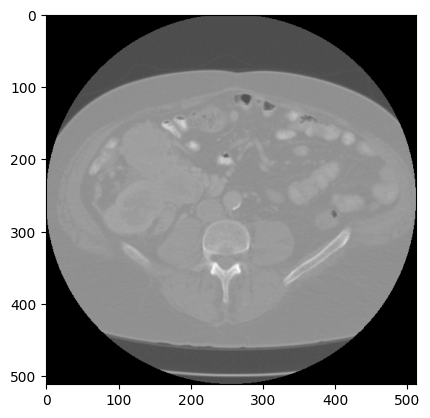

In [27]:
# I checked that image is abosolutely the same if it is nifti or .npy
# ct_nii = nib.load('../kits21/kits21/data/case_00233/imaging.nii.gz').get_fdata()
# print(ct_nii.shape)
# test = ct_nii[55,:,:]
# plt.imshow(test, cmap = 'gray')

# ct_nii = np.load('./preprocessed-data/images/case_00233.npy')
# print(ct_nii.shape)
# test = ct_nii[55,:,:]
# plt.imshow(test, cmap = 'gray')

# val_dict, labels_val = load_data_to_evaluate_by_majority_voting('./preprocessed-data/', 'images', '../kits21/kits21/data/kits.json', val_case)
# ct_nii = val_dict['case_00233']
# print(ct_nii.shape)
# test = ct_nii[55,:,:]
# plt.imshow(test, cmap = 'gray')